In [1]:
def calculate_sharpe(returns, risk_free_rate=0):
    excess_ret = returns - risk_free_rate / 252
    return np.sqrt(252) * (excess_ret.mean() / excess_ret.std())

def calculate_max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()



In [5]:
# Momentum and Mean Reversion signals
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_5'] = df['Close'].rolling(window=5).mean()

# Momentum Strategy: Buy if 5-day SMA > 20-day SMA
df['Signal_Momentum'] = np.where(df['SMA_5'] > df['SMA_20'], 1, -1)

# Mean Reversion Strategy: Buy if price < 20-day SMA
df['Signal_MR'] = np.where(df['Close'] < df['SMA_20'], 1, -1)

# Daily returns
df['Return'] = df['Close'].pct_change()
df['Strategy_Return_Momentum'] = df['Signal_Momentum'].shift(1) * df['Return']
df['Strategy_Return_MR'] = df['Signal_MR'].shift(1) * df['Return']


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("reliance.csv", skiprows=[1], index_col=0, parse_dates=True)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']


/var/folders/gn/yy_br7zx0mzbg86m2vwjm9rc0000gn/T/ipykernel_25256/1703345934.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("reliance.csv", skiprows=[1], index_col=0, parse_dates=True)


In [6]:
# Cumulative returns
df['Cumulative_Market'] = (1 + df['Return']).cumprod()
df['Cumulative_Strategy_Momentum'] = (1 + df['Strategy_Return_Momentum']).cumprod()
df['Cumulative_Strategy_MR'] = (1 + df['Strategy_Return_MR']).cumprod()

# Performance summary
metrics = {
    'Strategy': ['Market', 'Momentum', 'Mean Reversion'],
    'Total Return': [
        df['Cumulative_Market'].iloc[-1],
        df['Cumulative_Strategy_Momentum'].iloc[-1],
        df['Cumulative_Strategy_MR'].iloc[-1]
    ],
    'Sharpe Ratio': [
        calculate_sharpe(df['Return']),
        calculate_sharpe(df['Strategy_Return_Momentum']),
        calculate_sharpe(df['Strategy_Return_MR'])
    ],
    'Max Drawdown': [
        calculate_max_drawdown(df['Cumulative_Market']),
        calculate_max_drawdown(df['Cumulative_Strategy_Momentum']),
        calculate_max_drawdown(df['Cumulative_Strategy_MR'])
    ]
}

results_df = pd.DataFrame(metrics)
results_df


,Strategy,Total Return,Sharpe Ratio,Max Drawdown
0,Market,1.785637,0.377613,-0.440829
1,Momentum,1.254265,0.135314,-0.515728
2,Mean Reversion,0.346396,-0.744738,-0.731490


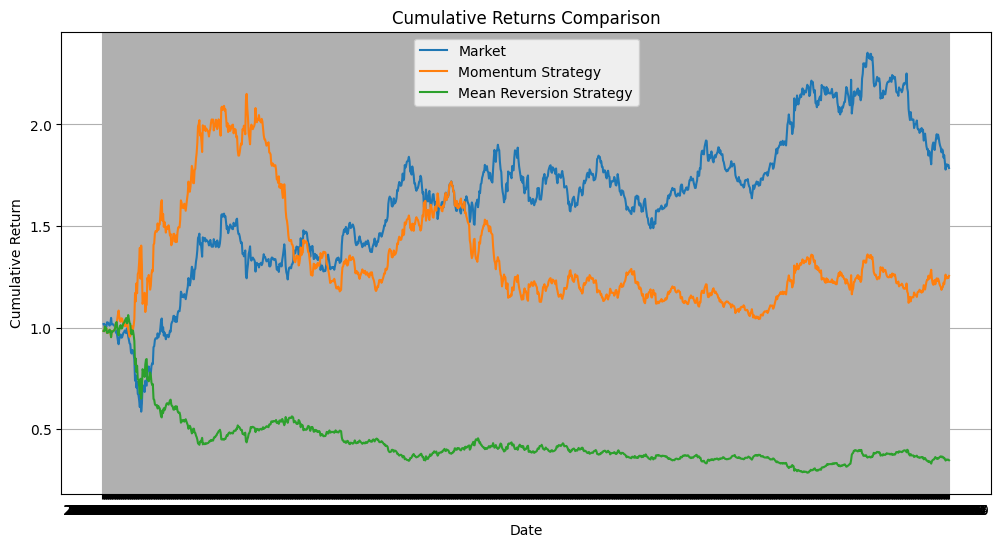

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df['Cumulative_Market'], label='Market')
plt.plot(df['Cumulative_Strategy_Momentum'], label='Momentum Strategy')
plt.plot(df['Cumulative_Strategy_MR'], label='Mean Reversion Strategy')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.show()
